<a href="https://colab.research.google.com/github/shambhavi-maker/LetsGrowMore/blob/main/Neural_Network_That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**"To Develop A Neural Network That Can Read Handwriting "**
## DATA ANALYTICS
## LGM VIP2021
### NAME:- SHAMBHAVI

A Convolutional Neural Network, also known as CNN or ConvNet, is a class of neural networks that specializes in processing data that has a grid-like topology, such as an image. A digital image is a binary representation of visual data. It contains a series of pixels arranged in a grid-like fashion that contains pixel values to denote how bright and what color each pixel should be.
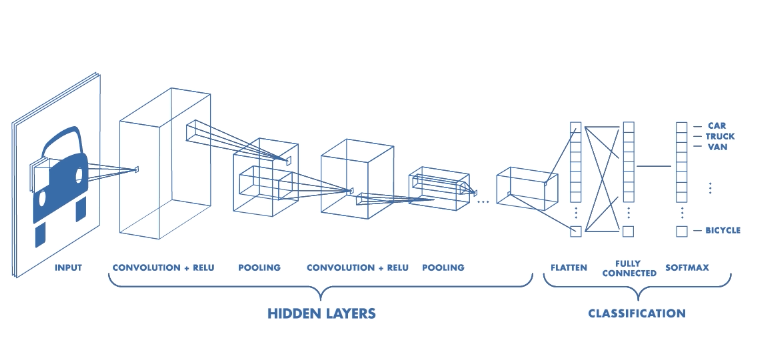

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING THE NECCESARY LIBERARIES**

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

**SEPRATING THE DATA INTO TRAIN AND TEST SET**

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

**LENGTH OF THE X-TRAIN,TEST IS CHECKED**

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

**PLOTTING OF THE X-TRAIN DIGIT**

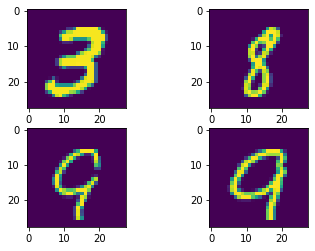

In [6]:
plt.subplot(221)
plt.imshow(x_train[7])
plt.subplot(222)
plt.imshow(x_train[300])
plt.subplot(223)
plt.imshow(x_train[782])
plt.subplot(224)
plt.imshow(x_train[3000])


**CREATING THE MODEL**

In [7]:
classify=Sequential()
classify.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
classify.add(MaxPooling2D())
classify.add(Flatten())
classify.add(Dense(128, activation='relu'))
classify.add(Dense(10, activation='softmax'))
#softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

**SHAPE OF THE X-TRAIN, TEST IS CHECKED**

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

**RESHAPING IS PERFORMED ON X-TRAIN,TEST AND Y-TRAIN,TEST**

In [10]:
# reshape the data so as to fit the format of (samples, height, width, channels)
xn_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
xn_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
xn_train.shape

(60000, 28, 28, 1)

In [11]:
yn_train = y_train.reshape(60000)
yn_test = y_test.reshape(10000)

yn_train = np_utils.to_categorical(yn_train)
yn_test = np_utils.to_categorical(yn_test)

In [12]:
xn_train= xn_train/255
xn_test= xn_test/255

**COMPILING OF MODEL**

In [13]:
# Compile model
classify.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**FITTING OF MODEL**

In [14]:
#fiting of model
classify.fit(xn_train,yn_train, epochs=5, batch_size=500)

Epoch 1/5
120/120 [==============================] - 24s 199ms/step - loss: 0.3608 - accuracy: 0.9037
Epoch 2/5
120/120 [==============================] - 24s 198ms/step - loss: 0.0930 - accuracy: 0.9730
Epoch 3/5
120/120 [==============================] - 24s 198ms/step - loss: 0.0589 - accuracy: 0.9833
Epoch 4/5
120/120 [==============================] - 24s 198ms/step - loss: 0.0460 - accuracy: 0.9866
Epoch 5/5
120/120 [==============================] - 24s 200ms/step - loss: 0.0380 - accuracy: 0.9890


**EVALUATION OF MODEL**

In [15]:
#evaluation of model
classify.evaluate(xn_test,yn_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0440 - accuracy: 0.9868


[0.04399853199720383, 0.9868000149726868]

**TEST DATA IS SHOWN**

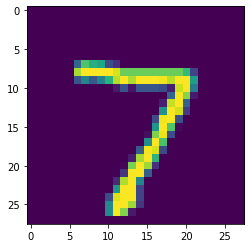

In [16]:
plt.imshow(x_test[0])

**PREDICTION OF MODEL**

In [17]:
#prediction of model
y_predict= classify.predict(xn_test[0:6])
y_predict[0]
np.argmax(y_predict[0])

7